In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style='whitegrid', palette='Set1', font_scale=1.45)
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('Pokemon.csv')

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Clustering Pokemon by Legendary Types

Using the K-Means algorithm, I want to be able to see if I can cluster Pokemon by their primary ability type


## Logistic Regression to determine Legendary or not. 

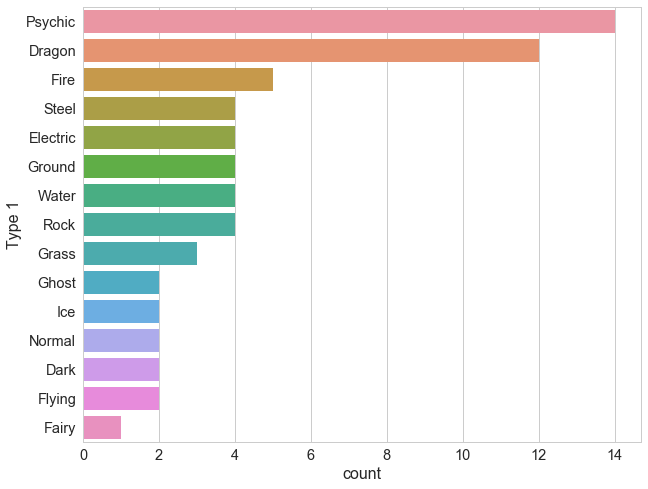

In [80]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y=df[df.Legendary==True]['Type 1'],  order=df[df.Legendary==True]['Type 1'].value_counts().index)

We should expect 15 clusters since there are 15 primary ability types for legendary Pokemon. 

In [81]:
legend_df = df[df.Legendary==True]

In [93]:
hp = legend_df['HP']
attack = legend_df['Attack']
X = np.array(list(zip(hp, attack)))

Text(0,0.5,'Attack')

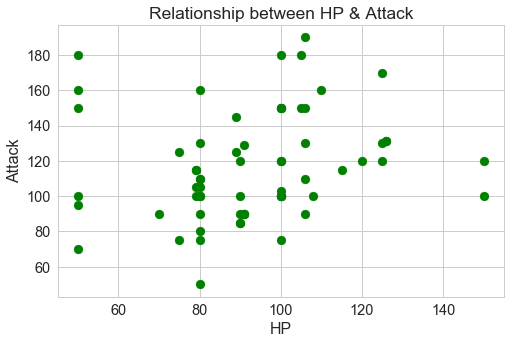

In [128]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(hp, attack, c='green', s=80)
plt.title('Relationship between HP & Attack')
plt.xlabel('HP')
plt.ylabel('Attack')

In [180]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [187]:
kmeans.inertia_

3638.4214285714288

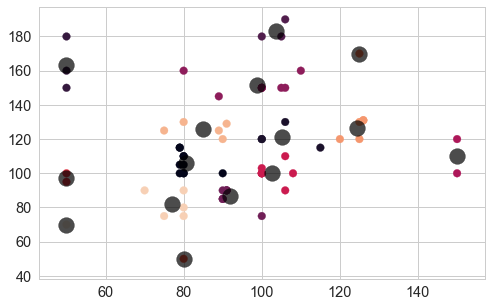

In [182]:
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=60)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[0:,1], s=250, alpha=0.7, c='black');

## Let's try to find the optimal number of clusters using the Silhouette Method and Elbow method

The elbow method shows that 5 is the optimal number of clusters. However, when comparing to the Silhouette method, 9 clusters has the highest average Silhouette score, indicating that there is a strong structure found. 

In [193]:
Ks = range(1,15)
SS = []
for K in Ks:
    kmean = KMeans(n_clusters=K)
    kmean.fit(X)
    SS.append(kmean.inertia_)

Text(0,0.5,'Inertia: Distance to Centroidd')

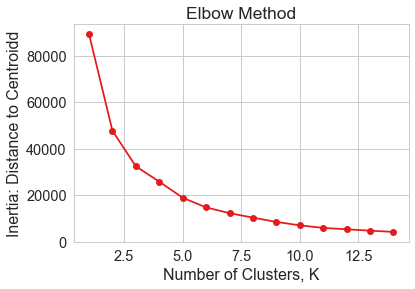

In [195]:
plt.plot(Ks, SS, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia: Distance to Centroidd')

Text(0.5,0,'K Clusters')

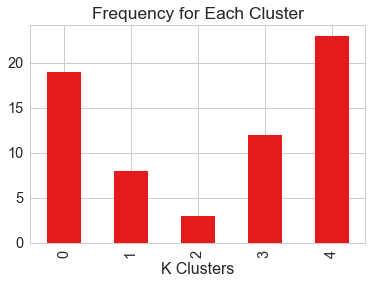

In [208]:
model = KMeans(n_clusters=5)
model.fit(X)
labels = model.fit_predict(X)
pd.value_counts(pd.Series(labels)).sort_index().plot(kind='bar')
plt.title('Frequency for Each Cluster')
plt.xlabel('K Clusters')

n-clusters: 2, silhouette score: 0.41418504886498975
n-clusters: 3, silhouette score: 0.3803980066421796
n-clusters: 4, silhouette score: 0.4217526540706125
n-clusters: 5, silhouette score: 0.3963691053372261
n-clusters: 6, silhouette score: 0.3972371539502619
n-clusters: 7, silhouette score: 0.42115243608719877
n-clusters: 8, silhouette score: 0.42883591675683713
n-clusters: 9, silhouette score: 0.449972393934873
n-clusters: 10, silhouette score: 0.4487856763345528
n-clusters: 11, silhouette score: 0.44504612164626783
n-clusters: 12, silhouette score: 0.47855002611653336
n-clusters: 13, silhouette score: 0.47531940231870223
n-clusters: 14, silhouette score: 0.4602967937543342
n-clusters: 15, silhouette score: 0.4620330660431392


Text(0,0.5,'Silhouette Score')

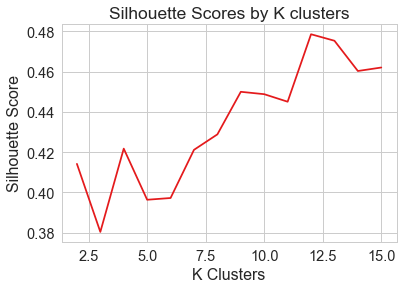

In [230]:
Ks = range(2,16)
silscores = []
for K in Ks:
    kmeans = KMeans(n_clusters=K)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silscores.append(silhouette_avg)
    
    print ('n-clusters: {}, silhouette score: {}'.format(K, silhouette_avg))
plt.plot(Ks, silscores)
plt.title('Silhouette Scores by K clusters')
plt.xlabel('K Clusters')
plt.ylabel('Silhouette Score')

Text(0.5,1,'With 5 Number of Clusters')

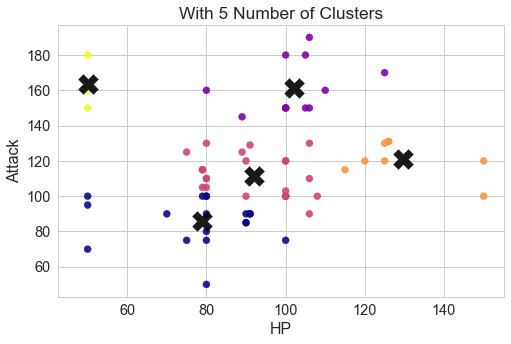

In [255]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='plasma', alpha=0.90)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[0:,1], s=400, alpha=0.9, c='black', marker='X');
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('With 5 Number of Clusters')

Text(0.5,1,'With 9 Number of Clusters')

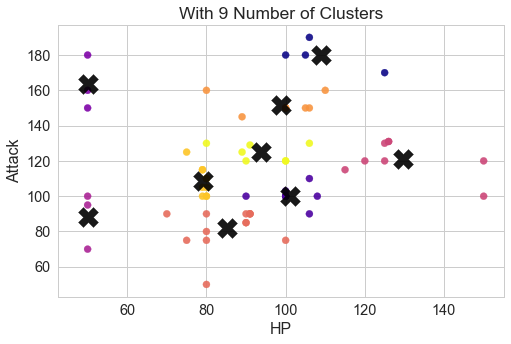

In [257]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
fig, ax = plt.subplots(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='plasma', alpha=0.90)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[0:,1], s=400, alpha=0.9, c='black', marker='X');
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('With 9 Number of Clusters')

### Let's try to MiniBatchKmeans

In [173]:
miniK = MiniBatchKMeans(n_clusters=4, init='k-means++')
miniK.fit(X)
y_minik = miniK.predict(X)

In [174]:
miniK.cluster_centers_

array([[  79.5862069 ,   85.02463054],
       [ 107.80528053,  155.        ],
       [  98.63903282,  112.20207254],
       [  50.        ,  162.20779221]])

### Let's see what happens when we add an additional attribute to the clusters

In [ ]:
X1 = np.array(list(zip(legend_df['Attack'], legend_df['HP'], legend_df['Defense'])))


Text(0.5,0.92,'Attack, HP, and Defense')

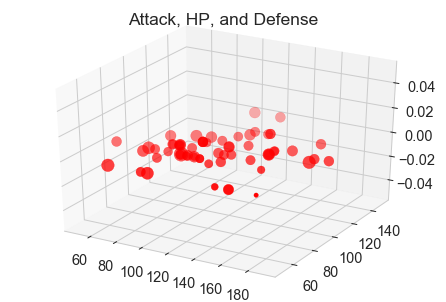

In [164]:
fig = plt.figure()
ax = Axes3D(fig)

plt.scatter(legend_df['Attack'], legend_df['HP'], legend_df['Defense'], c='red')
plt.title('Attack, HP, and Defense')

In [166]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)
labels = kmeans.predict(X1)
C = kmeans.cluster_centers_

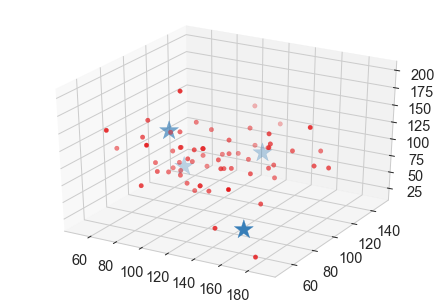

In [170]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1[:,0], X1[:, 1], X1[:, 2])
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', s=400)

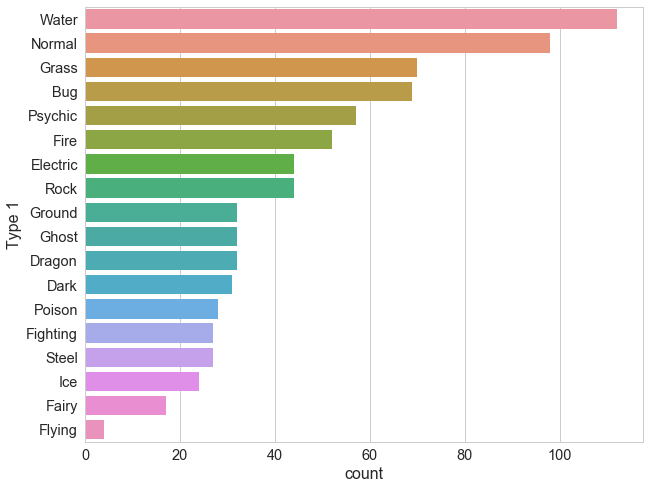

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y=df['Type 1'], order=df['Type 1'].value_counts().index)